# MERTON CREDIT MODEL

Check the method for generating correlation Gaussian random numbers

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.models.FinModelMertonCredit import *

####################################################################
# FINANCEPY BETA Version 0.185 - This build:  16 Nov 2020 at 12:53 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#      Send any bug reports or comments to quant@financepy.com     #
####################################################################



## Merton Credit Model

The Merton model class contains all of the model parameters. Some may be vectorised.

In [6]:
assetValue = [2.6406, 2.6817, 3.977, 2.947, 2.528]
equityVol = [0.7103, 0.3929, 0.3121, 0.4595, 0.6181]
bondFace = [4.0, 3.5, 3.5, 3.2, 4.0]
riskFreeRate = [0.05, 0.05, 0.05, 0.05, 0.05]
assetGrowthRate = [0.0306, 0.03, 0.031, 0.0302, 0.0305]
timeToMaturity = 1.0 # np.linspace(0.1, 10, 100)

In [7]:
model = FinModelMertonCredit(assetValue, bondFace, timeToMaturity, riskFreeRate, assetGrowthRate, equityVol)

In [8]:
model

OBJECT TYPE: FinModelMertonCredit
ASSET VALUE: [2.6406 2.6817 3.977  2.947  2.528 ]
BOND FACE: [4.  3.5 3.5 3.2 4. ]
YEARS TO MATURITY: 1.0
ASSET GROWTH: [0.0306 0.03   0.031  0.0302 0.0305]
VOLATILITY: [0.7103 0.3929 0.3121 0.4595 0.6181]

In [14]:
model._assetValue

array([2.6406, 2.6817, 3.977 , 2.947 , 2.528 ])

In [10]:
model.creditSpread()

array([0.58926535, 0.34877408, 0.11192498, 0.26713499, 0.5782954 ])

In [11]:
model.leverage()

array([0.66015   , 0.7662    , 1.13628571, 0.9209375 , 0.632     ])

In [12]:
model.equityValue()

array([0.42166132, 0.21226622, 0.84761036, 0.49717688, 0.28458566])

In [13]:
model.probDefault()

array([0.81506997, 0.78753747, 0.36217599, 0.63430287, 0.8418491 ])

Text(0, 0.5, 'Equity Value')

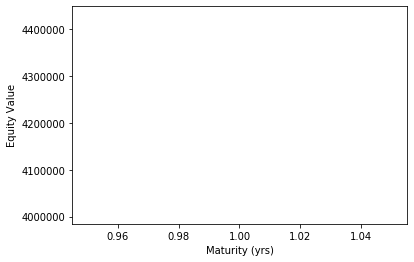

In [59]:
plt.plot(timeToMaturity, model.equityValue())
plt.xlabel("Maturity (yrs)")
plt.ylabel("Equity Value")

Text(0, 0.5, 'Prob Default')

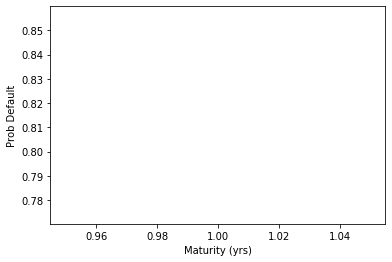

In [60]:
plt.plot(timeToMaturity, model.probDefault())
plt.xlabel("Maturity (yrs)")
plt.ylabel("Prob Default")

Copyright (c) 2020 Dominic O'Kane